# Description:                                                                                                                   
The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Dataset url : https://www.kaggle.com/uciml/pima-indians-diabetes-database

# Step 0: Import libraries and Dataset

In [2]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
dataset = pd.read_csv('encoded_dataset.csv')


# Step 1: Descriptive Statistics

In [4]:
# Preview data
dataset.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
0,80.0,0,1,25.19,6.6,140.0,True,False,False,False,False,False,False,True,False,0
1,54.0,0,0,27.32,6.6,80.0,True,False,False,True,False,False,False,False,False,0
2,28.0,0,0,27.32,5.7,158.0,False,True,False,False,False,False,False,True,False,0
3,76.0,1,1,20.14,4.8,155.0,False,True,False,False,True,False,False,False,False,0
4,20.0,0,0,27.32,6.6,85.0,True,False,False,False,False,False,False,True,False,0


In [5]:
# Dataset dimensions - (rows, columns)
dataset.shape

(99755, 16)

In [6]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99755 entries, 0 to 99754
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          99755 non-null  float64
 1   hypertension                 99755 non-null  int64  
 2   heart_disease                99755 non-null  int64  
 3   bmi                          99755 non-null  float64
 4   HbA1c_level                  99755 non-null  float64
 5   blood_glucose_level          99755 non-null  float64
 6   gender_Female                99755 non-null  bool   
 7   gender_Male                  99755 non-null  bool   
 8   gender_Other                 99755 non-null  bool   
 9   smoking_history_No Info      99755 non-null  bool   
 10  smoking_history_current      99755 non-null  bool   
 11  smoking_history_ever         99755 non-null  bool   
 12  smoking_history_former       99755 non-null  bool   
 13  smoking_history_

In [7]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,99755.0,41.887736,22.517793,0.08,24.00,43.00,60.00,80.00
hypertension,99755.0,0.074863,0.263172,0.00,0.00,0.00,0.00,1.00
heart_disease,99755.0,0.039397,0.194537,0.00,0.00,0.00,0.00,1.00
bmi,99755.0,27.322577,6.639739,10.01,23.63,27.32,29.58,95.69
HbA1c_level,99755.0,5.527432,1.070794,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,99755.0,138.056057,40.707680,80.00,100.00,140.00,159.00,300.00
diabetes,99755.0,0.085058,0.278970,0.00,0.00,0.00,0.00,1.00


# Step 3: Data Preprocessing

In [8]:
# Count of null values
dataset.isnull().sum()

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
gender_Female                  0
gender_Male                    0
gender_Other                   0
smoking_history_No Info        0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
diabetes                       0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [10]:
print(X_train)

[[80.0 1 0 ... True False False]
 [61.0 0 0 ... False True False]
 [16.0 0 0 ... False False False]
 ...
 [73.0 0 0 ... True False False]
 [3.0 0 0 ... False True False]
 [51.0 0 0 ... True False False]]


In [11]:
print(X_train.shape)

(79804, 15)


# Step 4: Data Modelling

In [12]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# Preprocess the dataset to remove rows with NaN or undefined values
def preprocess_data(X, y):
    # Combine features and labels into a single DataFrame for easy manipulation
    data = pd.concat([pd.DataFrame(X), pd.Series(y, name="label")], axis=1)

    # Remove rows with any NaN or undefined values
    data = data.dropna()

    # Split back into features and labels
    X_clean = data.iloc[:, :-1].values
    y_clean = data.iloc[:, -1].values

    return X_clean, y_clean

# Apply preprocessing to training data
X_train_clean, y_train_clean = preprocess_data(X_train, y_train)

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model on the cleaned data
logreg.fit(X_train_clean, y_train_clean)

print("Model trained successfully after removing rows with missing values.")


Model trained successfully after removing rows with missing values.


C:\Users\ANEESH VISHWA\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# # from sklearn import metrics
# # from sklearn.neighbors import KNeighborsClassifier
# # import pandas as pd
# # import matplotlib.pyplot as plt

# # # Function to preprocess data: remove rows with NaN or undefined values
# # def preprocess_data(X, y):
# #     # Combine features and labels into a single DataFrame
# #     data = pd.concat([pd.DataFrame(X), pd.Series(y, name="label")], axis=1)

# #     # Remove rows with any NaN or undefined values
# #     data = data.dropna()

# #     # Split back into features and labels
# #     X_clean = data.iloc[:, :-1].values
# #     y_clean = data.iloc[:, -1].values

# #     return X_clean, y_clean

# # # Preprocess training and testing data
# # X_train_clean, y_train_clean = preprocess_data(X_train, y_train)
# # X_test_clean, y_test_clean = preprocess_data(X_test, y_test)

# # # Range of neighbors to evaluate
# # X_axis = list(range(1, 31))
# # acc = []  # Using a list to store accuracy values

# # # Loop through different values of n_neighbors
# # for i in X_axis:
# #     knn_model = KNeighborsClassifier(n_neighbors=i)
# #     knn_model.fit(X_train_clean, y_train_clean)  # Train on cleaned data
# #     prediction = knn_model.predict(X_test_clean)  # Predict on cleaned test data
# #     acc.append(metrics.accuracy_score(y_test_clean, prediction))  # Append accuracy

# # # Convert accuracy list to Pandas Series for better analysis
# # acc = pd.Series(acc)

# # # Plot the accuracy against n_neighbors
# # plt.plot(X_axis, acc, marker='o', linestyle='-', color='b')
# # plt.xticks(X_axis, rotation=90)
# # plt.title("Finding Best Value for n_neighbors")
# # plt.xlabel("n_neighbors")
# # plt.ylabel("Accuracy")
# # plt.grid(True)
# plt.show()

# # # Print the highest accuracy
# # print("Highest accuracy:", acc.max())


In [14]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

# Preprocess function to remove rows with NaN values
def preprocess_data(X, y):
    # Combine features and labels into a single DataFrame
    data = pd.concat([pd.DataFrame(X), pd.Series(y, name="label")], axis=1)

    # Remove rows with any NaN values
    data = data.dropna()

    # Split back into features and labels
    X_clean = data.iloc[:, :-1].values
    y_clean = data.iloc[:, -1].values

    return X_clean, y_clean

# Apply preprocessing
X_train_clean, y_train_clean = preprocess_data(X_train, y_train)

# Define and train the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24, metric='minkowski', p=2)
knn.fit(X_train_clean, y_train_clean)

# If you have a test set, preprocess it similarly
X_test_clean, y_test_clean = preprocess_data(X_test, y_test)

# Make predictions
predictions = knn.predict(X_test_clean)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_clean, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 95.39%


In [15]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        # Convert labels from (0, 1) to (-1, 1)
        y = np.where(y == 0, -1, 1)
        
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # If condition is satisfied, apply only regularization
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    # If condition is not satisfied, update weights and bias
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.learning_rate * y[idx]

    def predict(self, X):
        # Prediction is based on the sign of (w.x - b)
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


In [16]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Initialize the LinearSVC model with a lower C value for more regularization
svm = LinearSVC(C=0.1, random_state=42, max_iter=1000)  # Reduced C to increase regularization

# Fit the SVM model to the training data
svm.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 96.10%


In [17]:
import joblib
import shap

C:\Users\ANEESH VISHWA\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
feature_names = [
    'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level',
    'gender_Female', 'gender_Male', 'gender_Other',
    'smoking_history_No Info', 'smoking_history_current', 'smoking_history_ever',
    'smoking_history_former', 'smoking_history_never', 'smoking_history_not current'
]

X_test_original = pd.DataFrame(X_test, columns=feature_names)


In [19]:
explainer = shap.KernelExplainer(svm.predict, X_train)

Using 79804 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Accuracy: 93.50%


100%|██████████| 100/100 [01:44<00:00,  1.04s/it]


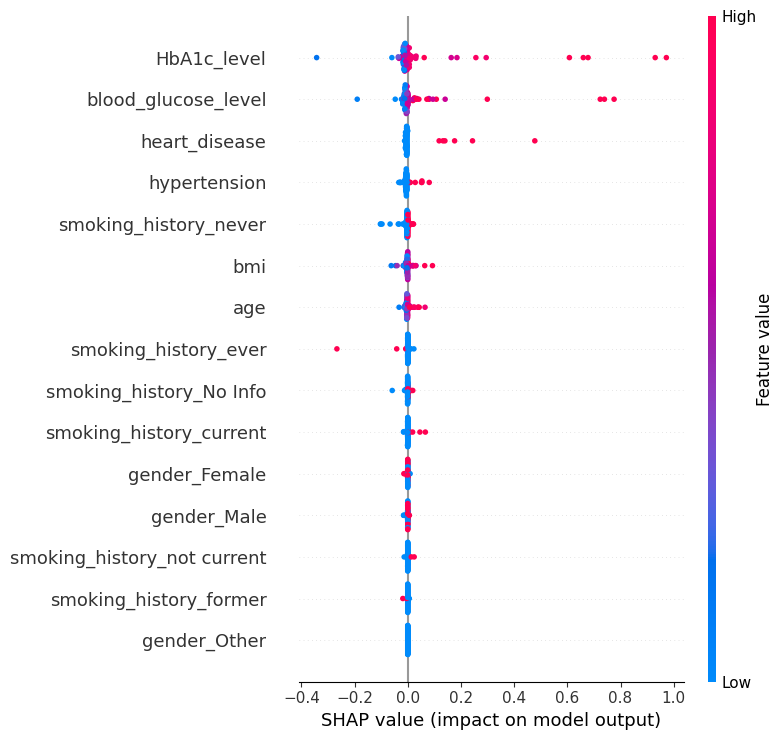

In [20]:
import shap
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X = pd.read_csv("encoded_dataset.csv")  # Your dataset here
y = X.pop('diabetes')  # Assume 'diabetes' is the target column

# Subsample the data for faster processing
X_subsample = X.sample(n=1000, random_state=42)  # Reduce data size to 1000 rows
y_subsample = y[X_subsample.index]  # Align target variable with the subsampled data

# Split the data into train and test sets (only for the subsampled data)
X_train, X_test, y_train, y_test = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Initialize and train the SVM model (using only a subsampled dataset)
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Reduce the background dataset for SHAP
X_train_subsample = X_train.sample(n=100, random_state=42)  # Further reduce the training set for SHAP

# Use KernelExplainer with a reduced number of background samples and fewer SHAP samples
explainer = shap.KernelExplainer(svm.predict, X_train_subsample, nsamples=50)  # Reduce the number of SHAP samples

# Calculate SHAP values for a smaller test set (optional: reduce the test set size as well)
X_test_subsample = X_test.sample(n=100, random_state=42)  # Further reduce the test set for SHAP
shap_values = explainer.shap_values(X_test_subsample)

# Visualize SHAP values (for example, summary plot)
shap.summary_plot(shap_values, X_test_subsample)

# A SHAP summary plot is generated to visually represent the feature importances across the test samples.
# The plot shows how much each feature contributes to the predicted outcome, highlighting the most impactful features

In [21]:
import shap
import numpy as np

# Example: Assuming you have shap_values calculated already
# Ensure shap_values corresponds to the number of instances in X_test
shap_values = explainer.shap_values(X_test_subsample)  # Assuming X_test_subsample is used here

# Extract feature names (if available from your dataset)
feature_names = X_test_subsample.columns

# List to hold the most important features for each instance
important_features = []

# Iterate over the instances in the test set (up to the length of X_test_subsample)
for i in range(len(X_test_subsample)):  # Ensure you are iterating over the correct range
    feature_contributions = shap_values[i]  # Get SHAP values for instance i
    max_feature_index = np.argmax(np.abs(feature_contributions))  # Get the index of the most important feature
    important_features.append(feature_names[max_feature_index])  # Add the name of the most important feature

# Optionally print or return the important features
print(important_features)


100%|██████████| 100/100 [01:52<00:00,  1.13s/it]

['blood_glucose_level', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'blood_glucose_level', 'HbA1c_level', 'HbA1c_level', 'blood_glucose_level', 'HbA1c_level', 'HbA1c_level', 'blood_glucose_level', 'HbA1c_level', 'hypertension', 'HbA1c_level', 'blood_glucose_level', 'HbA1c_level', 'hypertension', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'blood_glucose_level', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'age', 'HbA1c_level', 'blood_glucose_level', 'HbA1c_level', 'blood_glucose_level', 'HbA1c_level', 'HbA1c_level', 'HbA1c_level', 'HbA1c_level', 'HbA1c_level', 'HbA1c_level', 'hypertension', 'hypertension', 'HbA1c_level', 'HbA1c_level', 'HbA1c_level', 'blood_glucose_level', 'HbA1c_level', 'HbA1c_level', 'HbA1c_level', 'blood_glucose_level', 'HbA1c_level', 'HbA1c_level', 'smoking_history_ever', 'HbA1c_level', 'blood_glucose_level', 'blood_glucose_level', 'blood_glucose_level', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'HbA1c_level', 'hypertension'

In [22]:
def load_and_predict_with_reason(new_input):
    svm_model = joblib.load('svm_model.pkl')
    scaler = joblib.load('scaler.pkl')

    new_input_scaled = scaler.transform(new_input)
    prediction = svm_model.predict(new_input_scaled)
    prediction = np.where(prediction == -1, 0, 1)[0]

    explainer = shap.KernelExplainer(svm_model.predict, scaler.transform(X_train))
    shap_values = explainer.shap_values(new_input_scaled)

    max_feature_index = np.argmax(np.abs(shap_values[0]))
    primary_reason = feature_names[max_feature_index]

    return prediction, primary_reason


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import shap
import numpy as np

# Assuming your dataset is already loaded and processed into X_train and y_train
# Ensure X_train has 8 features
X_train = X_train.iloc[:, :8]  # Slicing X_train to have only 8 features if it has more

# Create a StandardScaler and fit it on the training data (X_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform it

# Define and train the SVM model on the scaled training data
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Ensure new_input has 8 features (matching the model's input size)
new_input = np.array([[1, 76.0, 0, 0, 0, 23.93, 5.8, 130]])  # Replace with actual data
new_input = new_input[:, :8]  # Only take the first 8 features, slice to match X_train

# Scale the new input using the scaler that was fit on X_train
new_input_scaled = scaler.transform(new_input)

# Predict using the trained SVM model
prediction = svm_model.predict(new_input_scaled)
prediction = np.where(prediction == -1, 0, 1)[0]  # Convert from -1 to 0 (if applicable)

# Create an explainer (use the training data with the same number of features)
explainer = shap.KernelExplainer(svm_model.predict, X_train_scaled)

# Calculate SHAP values for the new input
shap_values = explainer.shap_values(new_input_scaled)

# Determine the most important feature
max_feature_index = np.argmax(np.abs(shap_values[0]))  # Index of the most important feature

# Optionally, print or return the result
print(f"Predicted class: {prediction}")
print(f"Most important feature index: {max_feature_index}")


C:\Users\ANEESH VISHWA\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
Using 800 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

Predicted class: 1
Most important feature index: 1


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import shap
import numpy as np

# Assuming your dataset is already loaded and processed into X_train and y_train
# Ensure X_train has 8 features
X_train = X_train.iloc[:, :8]  # Slicing X_train to have only 8 features if it has more

# Create a StandardScaler and fit it on the training data (X_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform it

# Define and train the SVM model on the scaled training data
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Ensure new_input has 8 features (matching the model's input size)
new_input = np.array([[1, 76.0, 0, 0, 0, 23.93, 5.8, 130]])  # Replace with actual data
new_input = new_input[:, :8]  # Only take the first 8 features, slice to match X_train

# Scale the new input using the scaler that was fit on X_train
new_input_scaled = scaler.transform(new_input)

# Predict using the trained SVM model
predicted_class = svm_model.predict(new_input_scaled)
predicted_class = np.where(predicted_class == -1, 0, 1)[0]  # Convert from -1 to 0 (if applicable)

# Create an explainer (use the training data with the same number of features)
explainer = shap.KernelExplainer(svm_model.predict, X_train_scaled)

# Calculate SHAP values for the new input
shap_values = explainer.shap_values(new_input_scaled)

# Determine the most important feature
max_feature_index = np.argmax(np.abs(shap_values[0]))  # Index of the most important feature

# Get the feature names (assumes you have column names in X_train)
feature_names = X_train.columns[:8]

# Get the name of the most important feature
primary_reason = feature_names[max_feature_index]

# Print the results
print(f"Predicted Class: {predicted_class}")
print(f"Primary Reason: {primary_reason}")


C:\Users\ANEESH VISHWA\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
Using 800 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

Predicted Class: 1
Primary Reason: hypertension
